In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import requests, threading, time, random
from datetime import datetime
import json

## Part 1 Crawl the company list from 

In [3]:
# Ctrl+Shift+J: open the Javascript for the webpage on Chrome

url = 'https://api.sgx.com/ipoprospectus/v1.0/?params=closing_date%2Cname%2Cid%2Cmodified_date%2Curl%2Cstatus&pagesize=250&pagestart=0'
req = requests.get(url)

In [4]:
type(req)

requests.models.Response

In [5]:
text = req.text

In [6]:
text

# so now text is JSON (JavaScript Object Notation) which is an open standard file format
#JSON is a language-independent data format. It was derived from JavaScript, 
#but many modern programming languages include code to generate and parse JSON-format data


# we will use the json package in Python to convert text into a Python dictionary


'{"meta":{"code":"200","message":"success","requestTimestamp":1634899205067,"responseTime":"42"},"data":[{"closing_date":1632801600000,"name":"AUDIENCE ANALYTICS LIMITED","id":"3347","modified_date":"09/17/2021 02:59:05 AM","url":"https://links.sgx.com/1.0.0/ipo-prospectus/3347/e226a614ccff8a381a2e6eb085dd78156fb9a8bc54a4cbf9352c9bd15270a648","status":"Completed"},{"closing_date":null,"name":"CAPITALAND INVESTMENT LIMITED","id":"3346","modified_date":"09/14/2021 08:25:53 AM","url":"https://links.sgx.com/1.0.0/ipo-prospectus/3346/e99e81140da29d3f655d3d323ec14c4af4e3072ab0603b6769d95ee12f20472e","status":"Completed"},{"closing_date":1627437600000,"name":"LION-OCBC SEC CHINA LEADERS","id":"3344","modified_date":"07/12/2021 02:37:43 AM","url":"https://links.sgx.com/1.0.0/ipo-prospectus/3344/e92e57aa485cbc724f7daa1cae63c30f266e50d946a972f731b6da1488711875","status":"Completed"},{"closing_date":null,"name":"DBXT FTSE VIETNAM ETF 10","id":"2928","modified_date":"06/25/2021 11:14:40 AM","url":

In [7]:
type(json.loads(text))   # it is a Python dictionary. {keyword1: object1, keyword2: object2}

dict

In [8]:
json.loads(text)  # you see that now it shows you a dictionary. 

{'meta': {'code': '200',
  'message': 'success',
  'requestTimestamp': 1634899205067,
  'responseTime': '42'},
 'data': [{'closing_date': 1632801600000,
   'name': 'AUDIENCE ANALYTICS LIMITED',
   'id': '3347',
   'modified_date': '09/17/2021 02:59:05 AM',
   'url': 'https://links.sgx.com/1.0.0/ipo-prospectus/3347/e226a614ccff8a381a2e6eb085dd78156fb9a8bc54a4cbf9352c9bd15270a648',
   'status': 'Completed'},
  {'closing_date': None,
   'name': 'CAPITALAND INVESTMENT LIMITED',
   'id': '3346',
   'modified_date': '09/14/2021 08:25:53 AM',
   'url': 'https://links.sgx.com/1.0.0/ipo-prospectus/3346/e99e81140da29d3f655d3d323ec14c4af4e3072ab0603b6769d95ee12f20472e',
   'status': 'Completed'},
  {'closing_date': 1627437600000,
   'name': 'LION-OCBC SEC CHINA LEADERS',
   'id': '3344',
   'modified_date': '07/12/2021 02:37:43 AM',
   'url': 'https://links.sgx.com/1.0.0/ipo-prospectus/3344/e92e57aa485cbc724f7daa1cae63c30f266e50d946a972f731b6da1488711875',
   'status': 'Completed'},
  {'closing_d

In [9]:
json.loads(text)['meta'] 

##for this Python dictionary:json.loads(text), return the value associated with the keyword 'meta' 

{'code': '200',
 'message': 'success',
 'requestTimestamp': 1634899205067,
 'responseTime': '42'}

In [10]:
data = json.loads(text)['data']

#for this Python dictionary:json.loads(text), return the value associated with the keyword 'data' 
# then assign the object to a new a variable called data.

In [11]:
print(data)


[{'closing_date': 1632801600000, 'name': 'AUDIENCE ANALYTICS LIMITED', 'id': '3347', 'modified_date': '09/17/2021 02:59:05 AM', 'url': 'https://links.sgx.com/1.0.0/ipo-prospectus/3347/e226a614ccff8a381a2e6eb085dd78156fb9a8bc54a4cbf9352c9bd15270a648', 'status': 'Completed'}, {'closing_date': None, 'name': 'CAPITALAND INVESTMENT LIMITED', 'id': '3346', 'modified_date': '09/14/2021 08:25:53 AM', 'url': 'https://links.sgx.com/1.0.0/ipo-prospectus/3346/e99e81140da29d3f655d3d323ec14c4af4e3072ab0603b6769d95ee12f20472e', 'status': 'Completed'}, {'closing_date': 1627437600000, 'name': 'LION-OCBC SEC CHINA LEADERS', 'id': '3344', 'modified_date': '07/12/2021 02:37:43 AM', 'url': 'https://links.sgx.com/1.0.0/ipo-prospectus/3344/e92e57aa485cbc724f7daa1cae63c30f266e50d946a972f731b6da1488711875', 'status': 'Completed'}, {'closing_date': None, 'name': 'DBXT FTSE VIETNAM ETF 10', 'id': '2928', 'modified_date': '06/25/2021 11:14:40 AM', 'url': 'https://links.sgx.com/1.0.0/ipo-prospectus/2928/cb35176dee

In [12]:
type(data) 
#data is a list of dictionaries. 
# Each dictionary contains info on a firm's IPO info: closing date, name, etc.

list

In [13]:
s1 = data[0] # get the first object from the list: note that each object from the list is separated with comma

In [14]:
# now let's create some empty lists to store information. 

lst_closing_date = []   
lst_name = []
lst_id = []
lst_mod_date = []
lst_url = []
lst_status = []

In [15]:
s1  # s1 variable is now a dictionary: containing pieces of informatin for the company audience analytics. 

{'closing_date': 1632801600000,
 'name': 'AUDIENCE ANALYTICS LIMITED',
 'id': '3347',
 'modified_date': '09/17/2021 02:59:05 AM',
 'url': 'https://links.sgx.com/1.0.0/ipo-prospectus/3347/e226a614ccff8a381a2e6eb085dd78156fb9a8bc54a4cbf9352c9bd15270a648',
 'status': 'Completed'}

In [16]:
s1['name']

'AUDIENCE ANALYTICS LIMITED'

In [17]:
# closing_date': 1632801600000: this is how much time it has elapsed between some original time in Python (e.g., 1960)
# and the IPO closing date. 
# we want to convert the elapsed time: 1632801600000 into the closing date using the fromtimestamp function from datetime package

lst_closing_date.append(datetime.fromtimestamp(int(str(s1['closing_date'])[:-3])))

lst_name.append(s1['name'])

lst_id.append(s1['id'])

lst_mod_date.append(s1['modified_date'])

lst_url.append(s1['url'])

lst_status.append(s1['status'])

In [18]:
df = pd.DataFrame({
    'closing_date':lst_closing_date,
    'name':lst_name,
    'id':lst_id,
    'mod_date':lst_mod_date,
    'url':lst_url,
    'status':lst_status
    }) 
#here we store the data into each variable as a dictionary. 
# with the keys of the dictionary as variable names, each column is a list. 


In [19]:
df

,closing_date,name,id,mod_date,url,status
0,2021-09-28 12:00:00,AUDIENCE ANALYTICS LIMITED,3347,09/17/2021 02:59:05 AM,https://links.sgx.com/1.0.0/ipo-prospectus/334...,Completed


In [20]:
# now let's write a for loop to get all the IPO firms' info. 

lst_closing_date = []
lst_name = []
lst_id = []
lst_mod_date = []
lst_url = []
lst_status = []

for i in range(len(data)):
    s1 = data[i]
    
    try:
        lst_closing_date.append(datetime.fromtimestamp(int(str(s1['closing_date'])[:-3])))   
        #if it fails: then do the except
    except:
        lst_closing_date.append('None')
        
    lst_name.append(s1['name'])
    lst_id.append(s1['id'])
    lst_mod_date.append(s1['modified_date'])
    lst_url.append(s1['url'])
    lst_status.append(s1['status'])
    
df_ipo = pd.DataFrame({
    'closing_date':lst_closing_date,
    'name':lst_name,
    'id':lst_id,
    'mod_date':lst_mod_date,
    'url':lst_url,
    'status':lst_status
})



In [21]:
df_ipo

,closing_date,name,id,mod_date,url,status
0,2021-09-28 12:00:00,AUDIENCE ANALYTICS LIMITED,3347,09/17/2021 02:59:05 AM,https://links.sgx.com/1.0.0/ipo-prospectus/334...,Completed
1,None,CAPITALAND INVESTMENT LIMITED,3346,09/14/2021 08:25:53 AM,https://links.sgx.com/1.0.0/ipo-prospectus/334...,Completed
2,2021-07-28 10:00:00,LION-OCBC SEC CHINA LEADERS,3344,07/12/2021 02:37:43 AM,https://links.sgx.com/1.0.0/ipo-prospectus/334...,Completed
3,None,DBXT FTSE VIETNAM ETF 10,2928,06/25/2021 11:14:40 AM,https://links.sgx.com/1.0.0/ipo-prospectus/292...,Completed
4,None,DBXT MSCI SINGAPORE IM ETF 10,3065,06/25/2021 09:21:48 AM,https://links.sgx.com/1.0.0/ipo-prospectus/306...,Completed
5,None,DBXT MSCI CHINA TRN ETF 10,3008,06/25/2021 09:17:22 AM,https://links.sgx.com/1.0.0/ipo-prospectus/300...,Completed
6,None,DBXT IBOXX SINGAPORE ETF 5,2992,06/21/2021 06:04:18 AM,https://links.sgx.com/1.0.0/ipo-prospectus/299...,Completed
7,2021-06-15 12:00:00,OTS HOLDINGS LIMITED,3343,06/10/2021 06:23:33 AM,https://links.sgx.com/1.0.0/ipo-prospectus/334...,Completed
8,None,SRI TRANG GLOVES (THAILAND) PUBLIC COMPANY LIM...,3342,05/07/2021 10:19:20 AM,https://links.sgx.com/1.0.0/ipo-prospectus/334...,Completed
9,None,LYXOR ETF ASIA EX 10,2915,05/05/2021 06:41:13 AM,https://links.sgx.com/1.0.0/ipo-prospectus/291...,Completed


## Part 2 : Explore more detail information from one company

Now we have the urls for each IPO company.  

Using the 2nd url for Capitaland Investment Limited in the previous table as an example. 


In [22]:
# we use the second one in our df_ipo as sample
url_2 = df_ipo.loc[1, 'url']   # 2nd row: the value for 'url'
print(url_2)

https://links.sgx.com/1.0.0/ipo-prospectus/3346/e99e81140da29d3f655d3d323ec14c4af4e3072ab0603b6769d95ee12f20472e


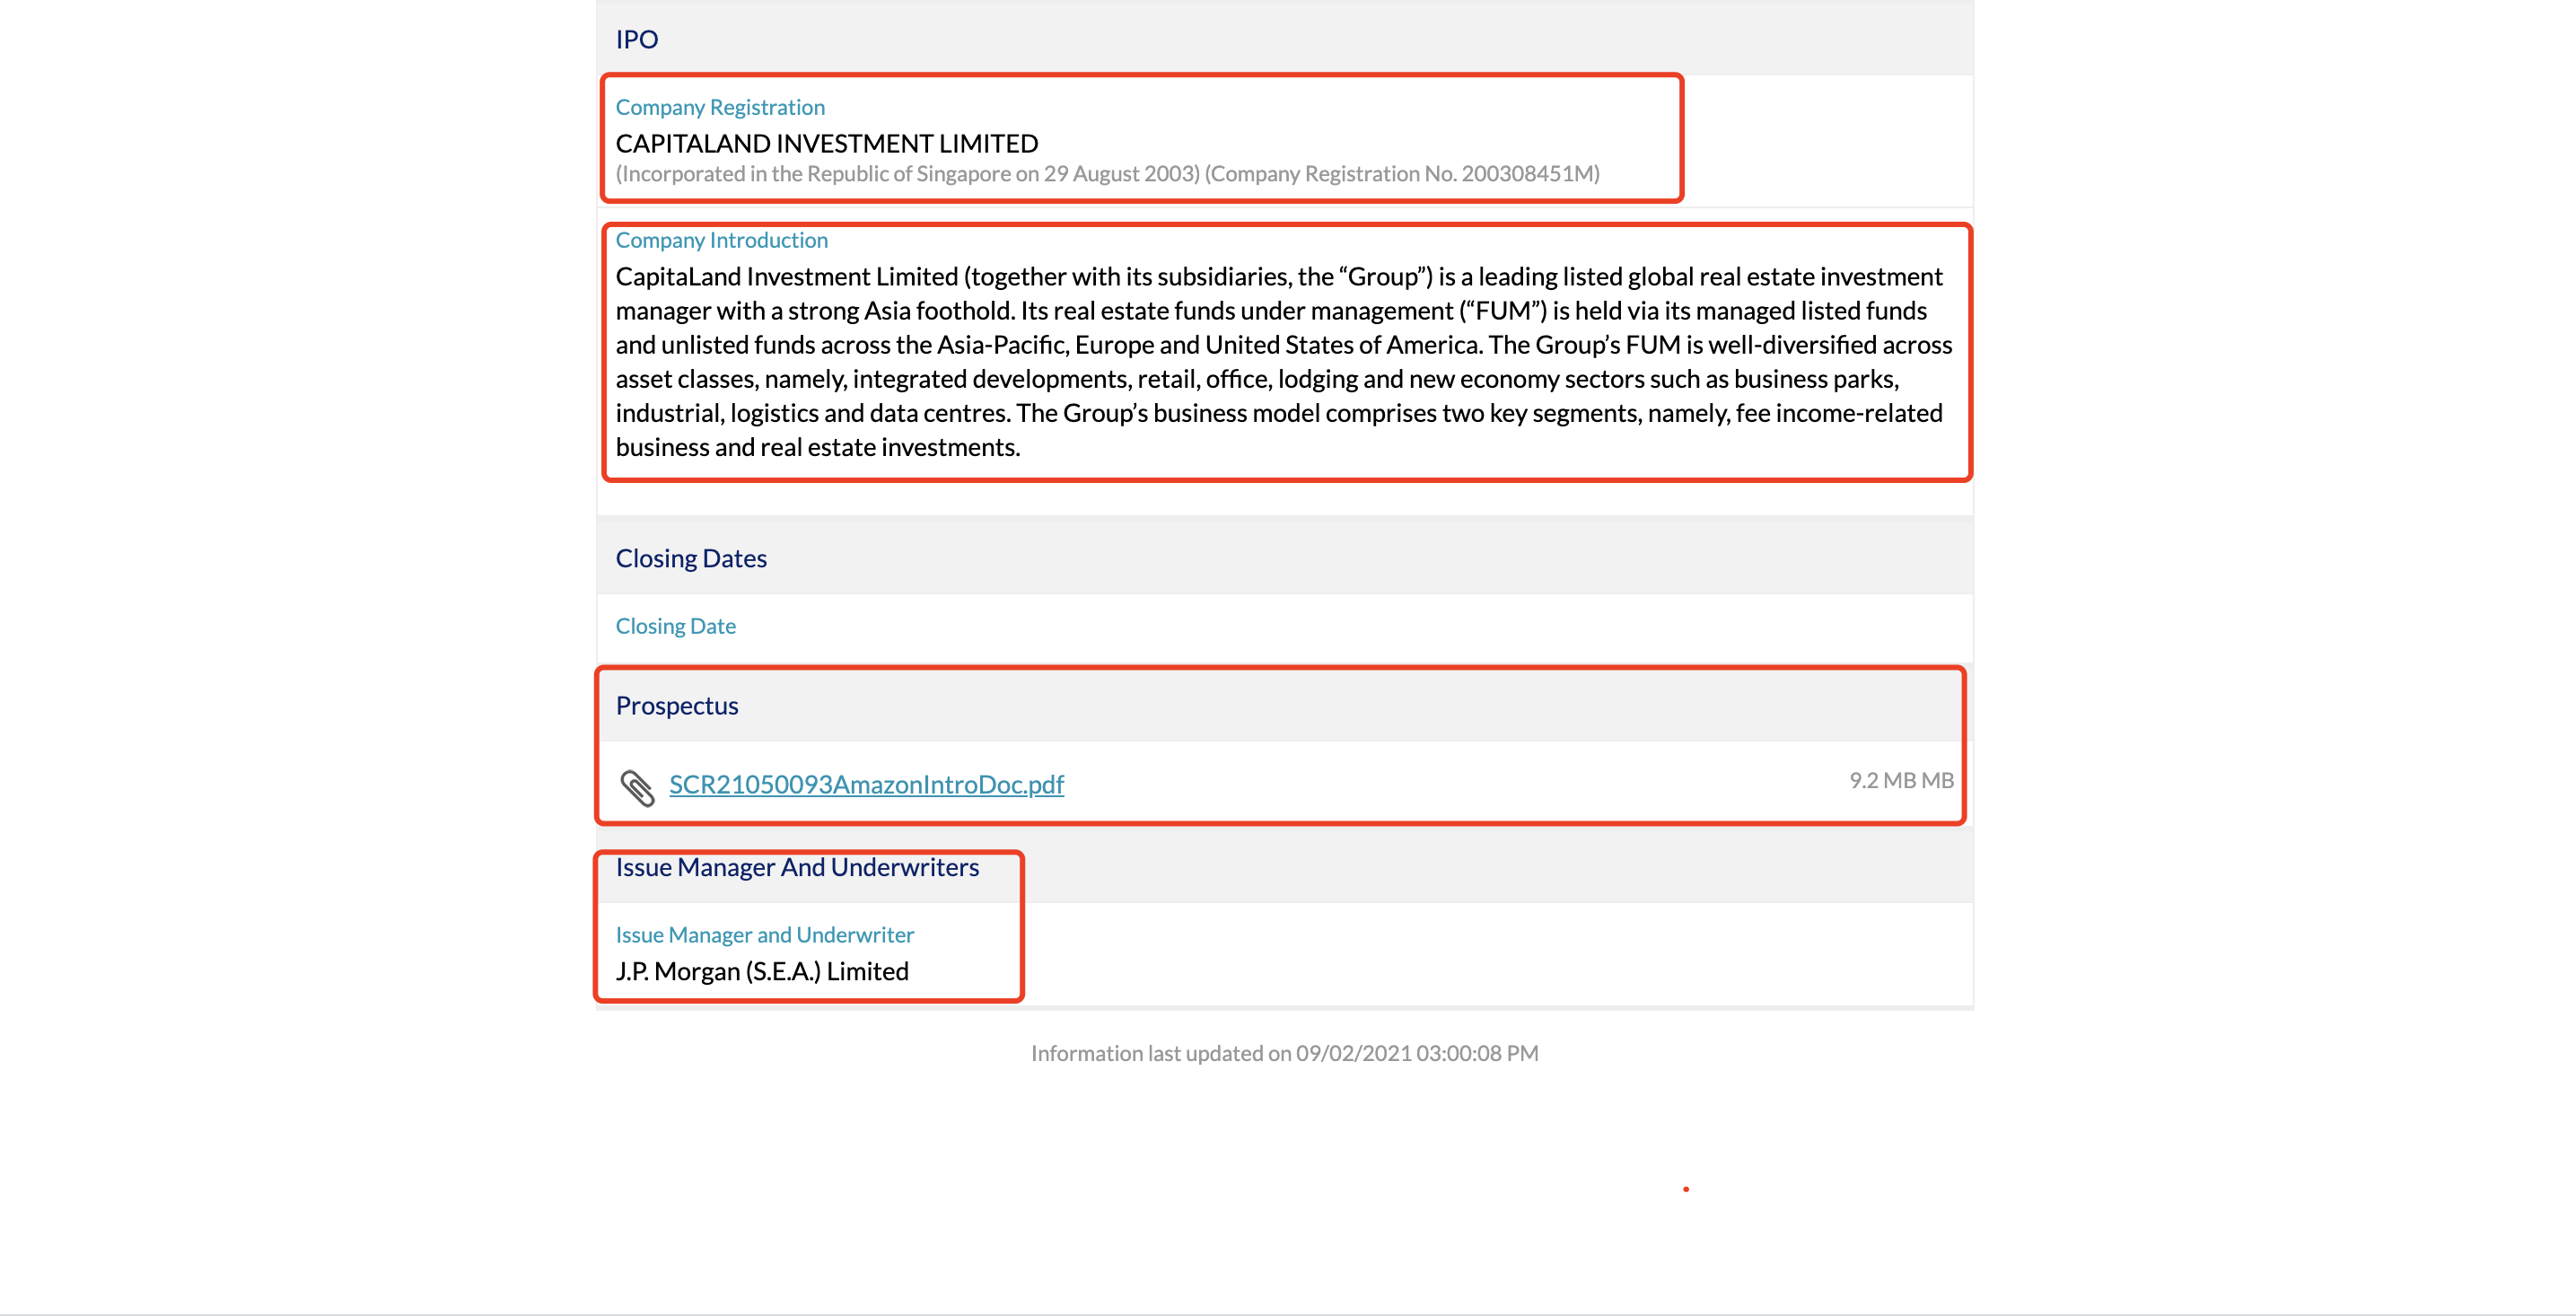

#### So from the website we can see there are four more pieces of information we want to collect:
1. Company Registration
2. Company Introduction
3. Prospectus(we need to click the link to download the IPO Prospectus file)
4. Issue Manager And Underwriters

Remember 'Closing Date'? We already have had this information in the last step so we can just ignore it. 

#### So now we do the same as before: browse the website using Python requests package

In [23]:
#same procedure as before
# using the requests package to download info from a url. 

req = requests.get(url_2)

In [24]:
req.text  # hard to read 

'\r\n\r\n \r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head id="Head1"><meta http-equiv="X-UA-Compatible" content="IE=edge" /><link rel="shortcut icon" type="image/x-icon" href="/image/favicon.ico" /><link href="../../../_layouts/1033/styles/SGX.COW.MasterPage/SGX_COW_MasterPage/SGX_Stocks.css" rel="stylesheet" type="text/css" />\r\n    <!-- Custom Corporate announcement -->\r\n    <link href="../../../_layouts/1033/styles/SGX.COW.MasterPage/SGX_COW_MasterPage/SGX_Master.css" rel="stylesheet" type="text/css" />\r\n    <!--Warrants-->\r\n    <link href="../../../_layouts/1033/styles/SGX.COW.MasterPage/SGX_COW_MasterPage/SGX_Warrants.css" rel="stylesheet" type="text/css" />\r\n    <!--CorpInfo-->\r\n    <link href="../../../_layouts/1033/styles/SGX.COW.MasterPage/SGX_COW_MasterPage/SGX_CorpInfo.css" rel="stylesheet" type="text/css" />\r\n    <!--IPOAllinOne-->\r\n    <link href="../../../_layouts/1033/styles/SGX.CO

In [25]:
#BeautifulSoup is a python package that can help us to parse (read) website information. 
#basically, making the req.text (which is a html file) more readable

soup = BeautifulSoup(req.text, 'html.parser')

In [26]:
soup.contents

['\n',
 'html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"',
 '\n',
 <html xmlns="http://www.w3.org/1999/xhtml">
 <head id="Head1"><meta content="IE=edge" http-equiv="X-UA-Compatible"/><link href="/image/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="../../../_layouts/1033/styles/SGX.COW.MasterPage/SGX_COW_MasterPage/SGX_Stocks.css" rel="stylesheet" type="text/css"/>
 <!-- Custom Corporate announcement -->
 <link href="../../../_layouts/1033/styles/SGX.COW.MasterPage/SGX_COW_MasterPage/SGX_Master.css" rel="stylesheet" type="text/css"/>
 <!--Warrants-->
 <link href="../../../_layouts/1033/styles/SGX.COW.MasterPage/SGX_COW_MasterPage/SGX_Warrants.css" rel="stylesheet" type="text/css"/>
 <!--CorpInfo-->
 <link href="../../../_layouts/1033/styles/SGX.COW.MasterPage/SGX_COW_MasterPage/SGX_CorpInfo.css" rel="stylesheet" type="text/css"/>
 <!--IPOAllinOne-->
 <link href="../../../_layouts/1033/styles/SGX.COW.MasterPage/SGX_COW_MasterPage/SGX_IPO_Page.css" rel="stylesheet

Now let's go back to the website and see where to find the information that we need

Ctrl+Shift+J: open the Javascript for the webpage on Chrome (not sure about how other browser works)

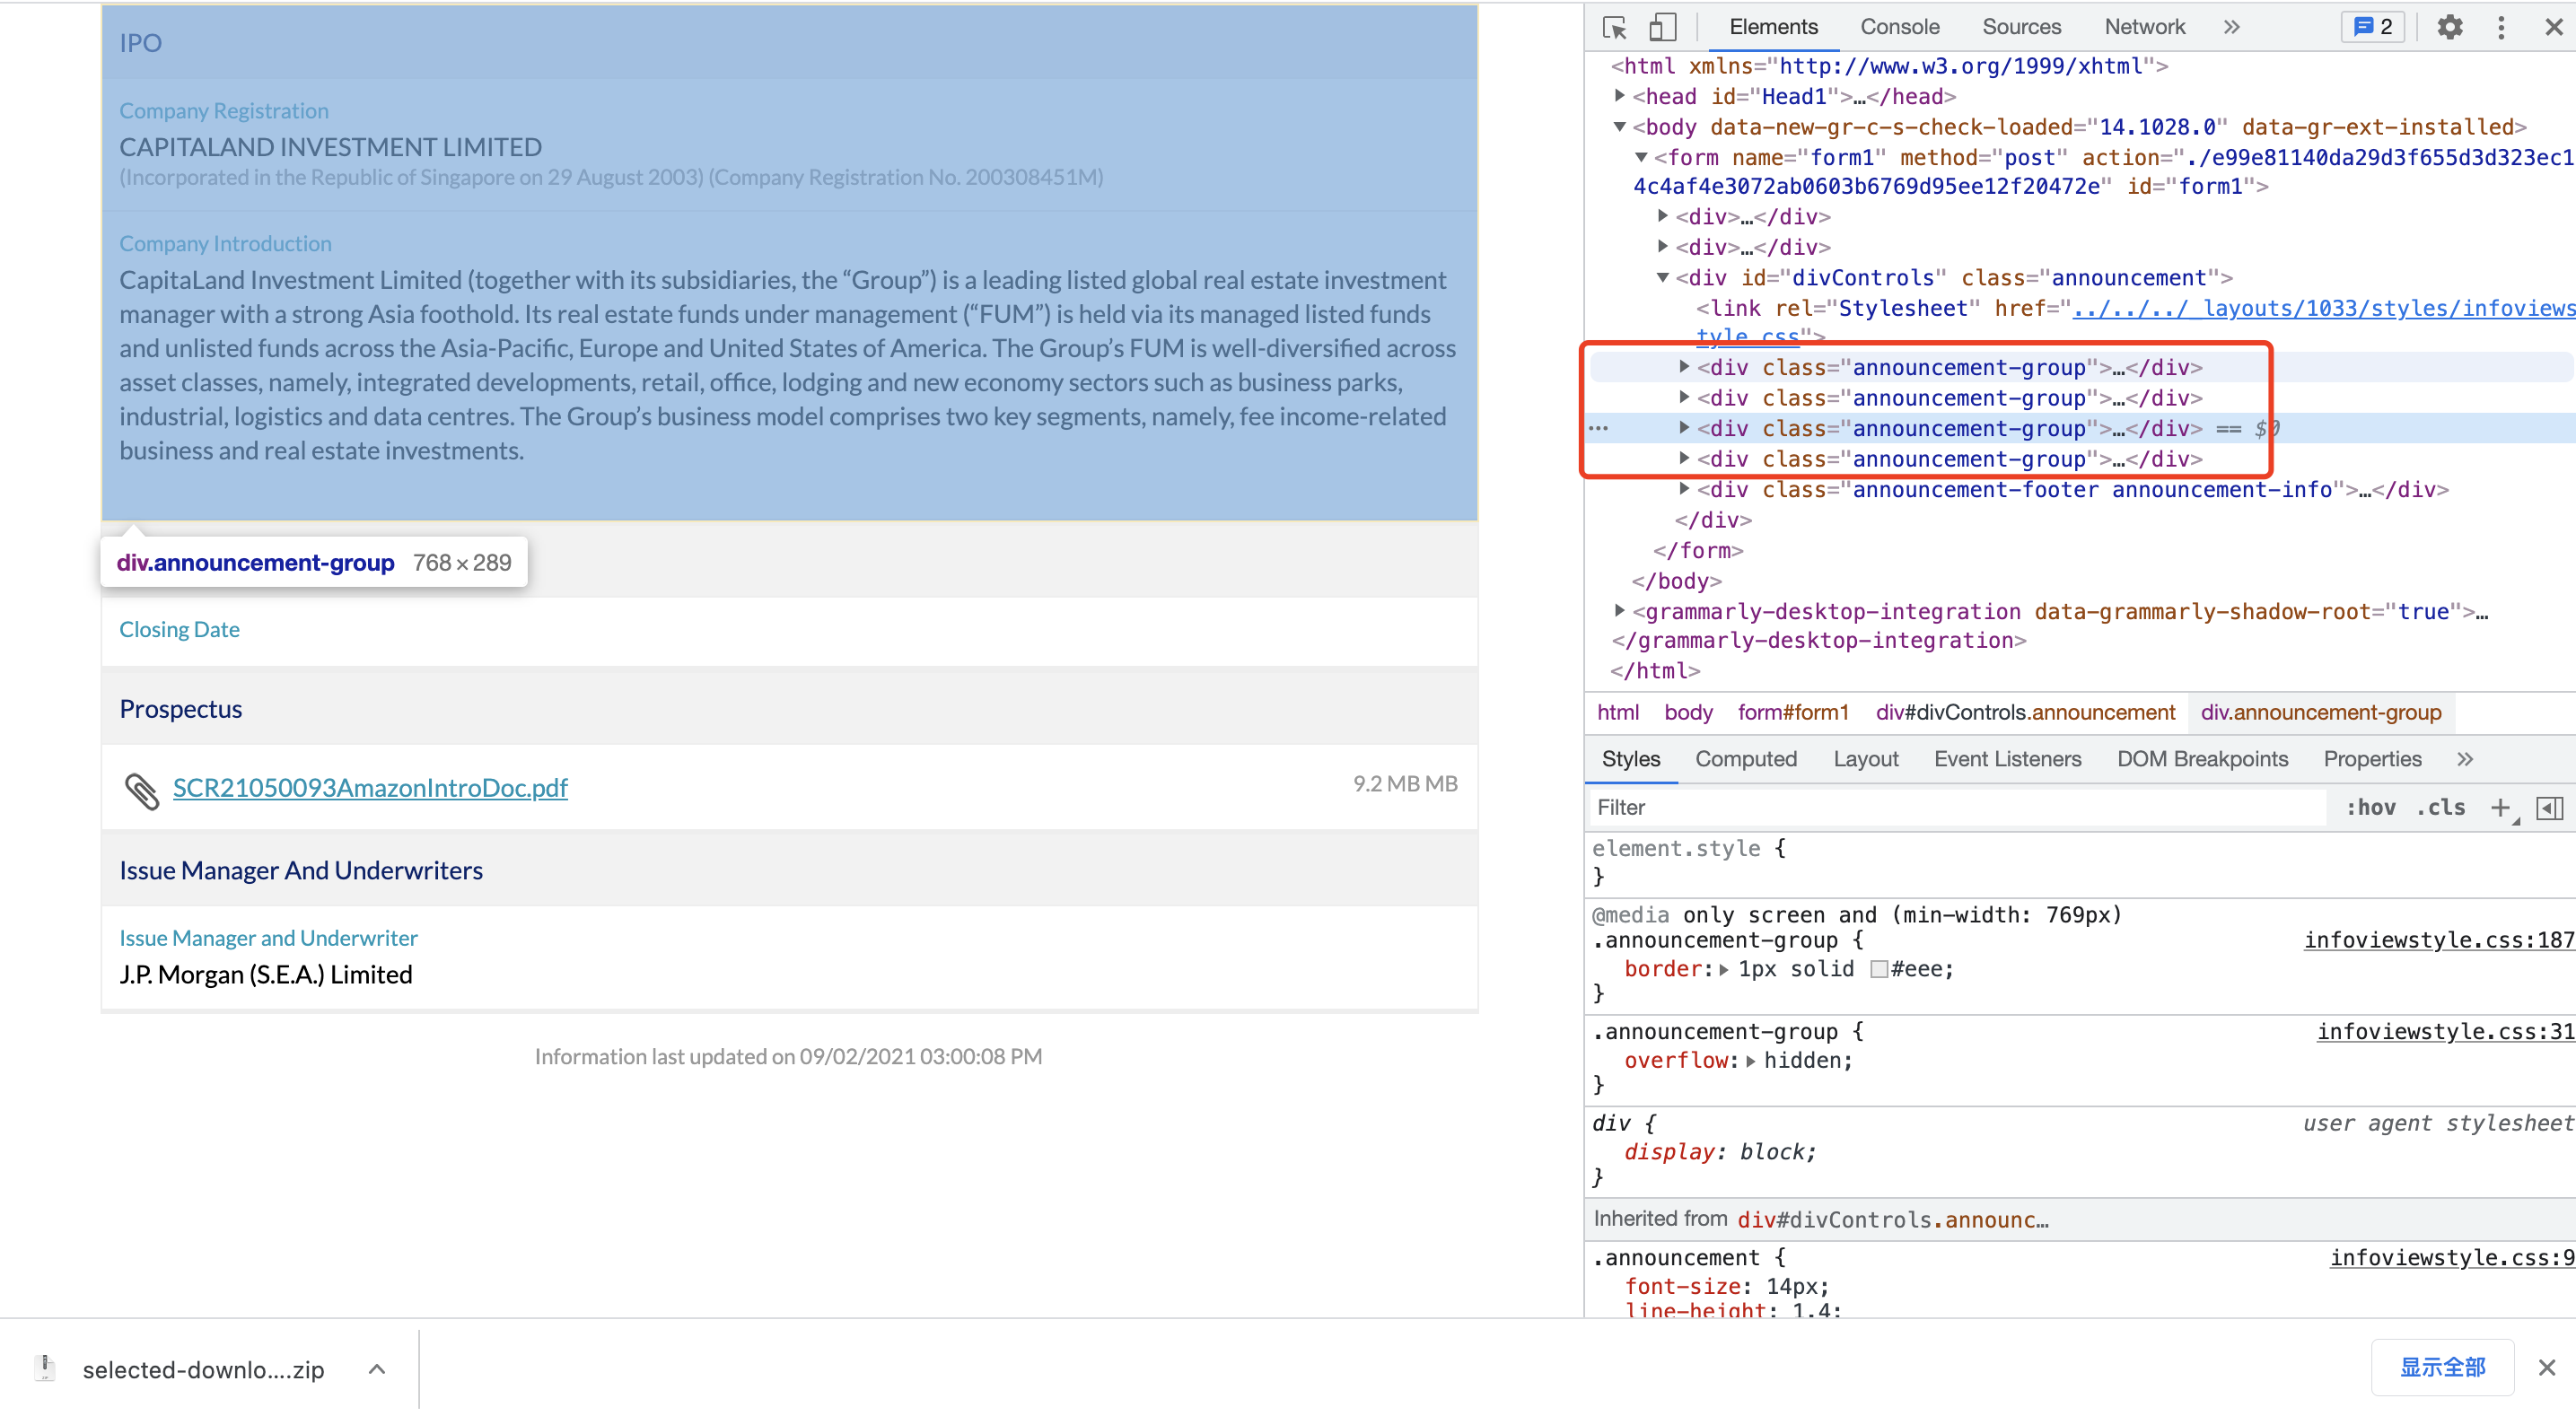

The information that we need is contained in div class="announcement-group" 

<div id="ctl07_lblIPOCompanyName"><span id="ctl07_lblIPOCompanyName">CAPITALAND INVESTMENT LIMITED</span></div>

In [27]:
# soup variable is the whole html file
# soup.select to select the parts of the html file that contain the information we need. 

#what we need: four div with class="announcement-group"
div = soup.select('div[class="announcement-group"]')

In [28]:
type(div)

list

In [29]:
len(div)

4

In [30]:
div

[<div class="announcement-group">
 <div class="announcement-group-header">IPO</div>
 <dl>
 <dt>Company Registration</dt>
 <dd>
 <div id="ctl07_lblIPOCompanyName"><span id="ctl07_lblIPOCompanyName">CAPITALAND INVESTMENT LIMITED</span></div>
 <div id="ctl07_lblIPOCompanyImage"></div>
 <div class="announcement-info" id="ctl07_lblIPOCompanyName_1"><span id="ctl07_lblIPOCompanyName_1">(Incorporated in the Republic of Singapore on 29 August 2003) (Company Registration No. 200308451M)</span></div>
 </dd>
 <dt>Company Introduction</dt>
 <dd class="announcement-richtext">
             CapitaLand Investment Limited (together with its subsidiaries, the “Group”) is a leading listed global real estate investment manager with a strong Asia foothold. Its real estate funds under management (“FUM”) is held via its managed listed funds and unlisted funds across the Asia-Pacific, Europe and United States of America. The Group’s FUM is well-diversified across asset classes, namely, integrated developments

In [31]:
#take a look at what contains in each div
div[0] #for the first div class announcement group

<div class="announcement-group">
<div class="announcement-group-header">IPO</div>
<dl>
<dt>Company Registration</dt>
<dd>
<div id="ctl07_lblIPOCompanyName"><span id="ctl07_lblIPOCompanyName">CAPITALAND INVESTMENT LIMITED</span></div>
<div id="ctl07_lblIPOCompanyImage"></div>
<div class="announcement-info" id="ctl07_lblIPOCompanyName_1"><span id="ctl07_lblIPOCompanyName_1">(Incorporated in the Republic of Singapore on 29 August 2003) (Company Registration No. 200308451M)</span></div>
</dd>
<dt>Company Introduction</dt>
<dd class="announcement-richtext">
            CapitaLand Investment Limited (together with its subsidiaries, the “Group”) is a leading listed global real estate investment manager with a strong Asia foothold. Its real estate funds under management (“FUM”) is held via its managed listed funds and unlisted funds across the Asia-Pacific, Europe and United States of America. The Group’s FUM is well-diversified across asset classes, namely, integrated developments, retail, of

In this part, we can see it contains two parts of information we want:
1. Company Registration
2. Company Introduction

### For company registration, the information is under element < span >

In [32]:
div[0].select('span')
# there are two <span ..> </span> 
# the first one contains the name of the company
# the second one contains the incorproation info of the company


[<span id="ctl07_lblIPOCompanyName">CAPITALAND INVESTMENT LIMITED</span>,
 <span id="ctl07_lblIPOCompanyName_1">(Incorporated in the Republic of Singapore on 29 August 2003) (Company Registration No. 200308451M)</span>]

In [33]:
type(div[0].select('span'))

list

In [34]:
name = div[0].select('span')[0].get_text()  # get_text() will help you get the text within: <span ..>       </span> 
registration_info = div[0].select('span')[1].get_text()

In [35]:
print('name : ', name)
print('regis_info : ', registration_info)

name :  CAPITALAND INVESTMENT LIMITED
regis_info :  (Incorporated in the Republic of Singapore on 29 August 2003) (Company Registration No. 200308451M)


### Company Introduction is under element dd with class="announcement-richtext"

In [36]:
dd = div[0].select('dd[class="announcement-richtext"]')

In [37]:
dd

[<dd class="announcement-richtext">
             CapitaLand Investment Limited (together with its subsidiaries, the “Group”) is a leading listed global real estate investment manager with a strong Asia foothold. Its real estate funds under management (“FUM”) is held via its managed listed funds and unlisted funds across the Asia-Pacific, Europe and United States of America. The Group’s FUM is well-diversified across asset classes, namely, integrated developments, retail, office, lodging and new economy sectors such as business parks, industrial, logistics and data centres. The Group’s business model comprises two key segments, namely, fee income-related business and real estate investments.<br/>
 <div><br/>
 </div>
 </dd>]

In [38]:
 dd[0].get_text()

'\r\n            CapitaLand Investment Limited (together with its subsidiaries, the “Group”) is a leading listed global real estate investment manager with a strong Asia foothold. Its real estate funds under management (“FUM”) is held via its managed listed funds and unlisted funds across the Asia-Pacific, Europe and United States of America. The Group’s FUM is well-diversified across asset classes, namely, integrated developments, retail, office, lodging and new economy sectors such as business parks, industrial, logistics and data centres. The Group’s business model comprises two key segments, namely, fee income-related business and real estate investments.\n\n\n'

In [39]:
company_intro = dd[0].get_text().replace('\r', '').replace('\n','')

In [40]:
print('Company_info : ', company_intro)

Company_info :              CapitaLand Investment Limited (together with its subsidiaries, the “Group”) is a leading listed global real estate investment manager with a strong Asia foothold. Its real estate funds under management (“FUM”) is held via its managed listed funds and unlisted funds across the Asia-Pacific, Europe and United States of America. The Group’s FUM is well-diversified across asset classes, namely, integrated developments, retail, office, lodging and new economy sectors such as business parks, industrial, logistics and data centres. The Group’s business model comprises two key segments, namely, fee income-related business and real estate investments.


### Prospectus

In [41]:
div[2]

<div class="announcement-group">
<div class="announcement-group-header">Prospectus</div>
<ul class="announcement-attachment-list" id="ctl07_bindAttachments"><li><a class="announcement-attachment" href="/FileOpen/CLI_Intro_Doc_C2324.ashx?App=IPO&amp;FileID=6306" id="ctl07_hlnk0" target="_blank">CLI_Intro_Doc_C2324.pdf</a><span class="announcement-attachment-size">9.2 MB</span></li></ul>
</div>

In [42]:
div[2].select('a[class="announcement-attachment"]')  
# the a class is how HTML stores external files (pdf: IPO documents, it has an attrbiute called href)

[<a class="announcement-attachment" href="/FileOpen/CLI_Intro_Doc_C2324.ashx?App=IPO&amp;FileID=6306" id="ctl07_hlnk0" target="_blank">CLI_Intro_Doc_C2324.pdf</a>]

In [43]:
div[2].select('a')[0]   

<a class="announcement-attachment" href="/FileOpen/CLI_Intro_Doc_C2324.ashx?App=IPO&amp;FileID=6306" id="ctl07_hlnk0" target="_blank">CLI_Intro_Doc_C2324.pdf</a>

In [44]:
href = div[2].select('a')[0].attrs['href']

In [45]:
href

'/FileOpen/CLI_Intro_Doc_C2324.ashx?App=IPO&FileID=6306'

In [46]:
sgx = 'https://links.sgx.com/'  

In [47]:
url_pdf = sgx + href

In [48]:
pdf_file= requests.get(url_pdf)

In [49]:
# before you run the following code, in your working directory (where your code is)
# create a folder called ipo to store all the IPO pdf files. 

#for each IPO pdf file: we will use the company name as the pdf file's name
# recall name = div[0].select('span')[0].get_text(): company name

# you are now opening a pdf file in the folder ipo which you created. 
# wb: if this file exists, just open it, and rewrite the pdf file
# if this file does not exists in the folder, create a new one and write the contents in. 

with open('ipo/{}.pdf'.format(name),'wb') as myfile:
    myfile.write(pdf_file.content)

FileNotFoundError: [Errno 2] No such file or directory: 'ipo/CAPITALAND INVESTMENT LIMITED.pdf'

### Issue Manager And Underwriters

In [ ]:
div[3]

In [ ]:
issuer = div[3].select('div[class="announcement-richtext"]')[0].get_text()

In [ ]:
print('Issue Manager :', issuer)